In [65]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"


In [66]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_citizen""" ).df()
df = df.drop(columns= 'geom')
con.close()

In [67]:
df.shape

(48675, 37)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48675 entries, 0 to 48674
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gbifID                         48675 non-null  int64         
 1   occurrenceID                   48675 non-null  object        
 2   url                            48675 non-null  object        
 3   year                           48675 non-null  int64         
 4   month                          48675 non-null  int64         
 5   day                            48675 non-null  int64         
 6   recordedBy                     48675 non-null  object        
 7   recordedByID                   0 non-null      object        
 8   occurrenceRemarks              3769 non-null   object        
 9   eventDate                      48675 non-null  object        
 10  identificationID               48565 non-null  Int64         
 11  identifiedBy   

In [69]:
df.describe()

,gbifID,year,month,day,identificationID,dateIdentified,catalogNumber,taxonID,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,media_count
count,4.867500e+04,48675.000000,48675.000000,48675.000000,48565.0,48565,4.867500e+04,4.867500e+04,48675.000000,48675.000000,48675.000000,48131.000000
mean,4.340246e+09,2022.628372,6.318213,16.051608,406999963.141851,2023-05-17 01:07:01.487017,1.800614e+08,1.114269e+05,45.477804,-72.645840,120.854566,1.693607
min,8.910432e+08,2011.000000,4.000000,1.000000,28767.0,2011-07-12 16:43:28,2.463700e+04,4.719200e+04,45.014753,-74.509312,0.000000,1.000000
25%,3.784636e+09,2021.000000,5.000000,8.000000,229165113.0,2022-01-02 01:16:39,9.270115e+07,5.265800e+04,45.308866,-73.326801,3.000000,1.000000
50%,4.846979e+09,2023.000000,6.000000,16.000000,398159546.0,2023-08-16 21:33:21,1.772553e+08,5.622200e+04,45.419451,-72.707655,8.000000,1.000000
75%,5.166919e+09,2025.000000,7.000000,24.000000,627476595.0,2025-05-06 02:30:37,2.788647e+08,8.257600e+04,45.544587,-72.046824,44.000000,2.000000
max,5.897908e+09,2025.000000,8.000000,31.000000,728429114.0,2025-11-20 15:39:58,3.273809e+08,1.627771e+06,46.817932,-70.230866,2998.000000,37.000000
std,1.026517e+09,2.410013,1.258673,9.143834,208024633.52903,NaN,9.352628e+07,1.904545e+05,0.336697,0.756648,364.481106,1.257040


In [70]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,url,recordedBy,recordedByID,occurrenceRemarks,eventDate,identifiedBy,identifiedByID,identificationRemarks,institutionCode,...,family,genus,species,taxonRank,sex,reproductiveCondition,annotations,occurrenceStatus,iucnRedListCategory,issue
count,48675,48675,48675,0,3769,48675,48565,2357,459,48675,...,48675,48675,48675,48675,549,8181,4403,48675,22911,48675
unique,48675,48675,2875,0,2480,45993,2877,35,421,1,...,137,578,1326,1,3,8,8,1,6,5
top,https://www.inaturalist.org/observations/28888838,https://www.inaturalist.org/observations/28888838,Vincent Laurie,NaN,"Parc National du Mont St Bruno, Quebec, Canada",2014-08-10,Vincent Laurie,https://orcid.org/0000-0002-9628-7557,?,iNaturalist,...,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Indeterminate,flowers,"{""leaves"":""green leaves""}",PRESENT,LC,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
freq,1,1,3565,NaN,110,16,3440,1942,5,48675,...,4944,1994,779,48675,377,2929,3803,48675,22009,45608


In [71]:
df.isnull().sum()

gbifID                               0
occurrenceID                         0
url                                  0
year                                 0
month                                0
day                                  0
recordedBy                           0
recordedByID                     48675
occurrenceRemarks                44906
eventDate                            0
identificationID                   110
identifiedBy                       110
identifiedByID                   46318
identificationRemarks            48216
dateIdentified                     110
catalogNumber                        0
institutionCode                      0
kingdom                              0
phylum                               0
class                                0
order                                0
family                               0
genus                                0
species                              0
taxonRank                            0
taxonID                  

In [72]:
df.duplicated().sum()
#df.drop_duplicates(inplace= True)

0

<Axes: xlabel='coordinateUncertaintyInMeters', ylabel='Count'>

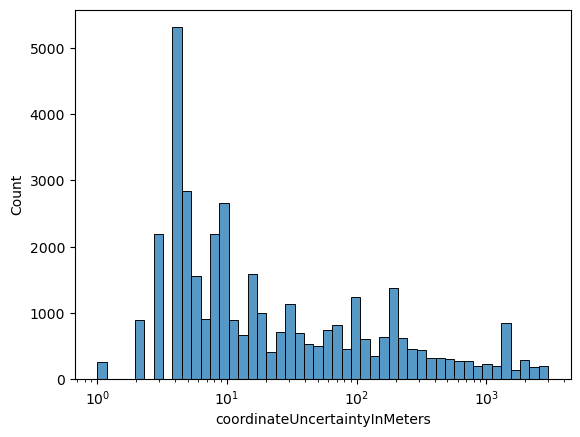

In [73]:
sns.histplot( df, x = 'coordinateUncertaintyInMeters', log_scale= True)

<Axes: xlabel='month', ylabel='Count'>

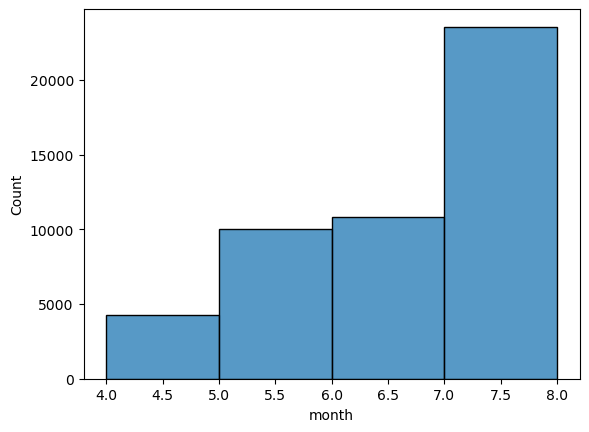

In [74]:
sns.histplot( df, x = 'month', bins=3, binwidth=(1))

<Axes: xlabel='year', ylabel='Count'>

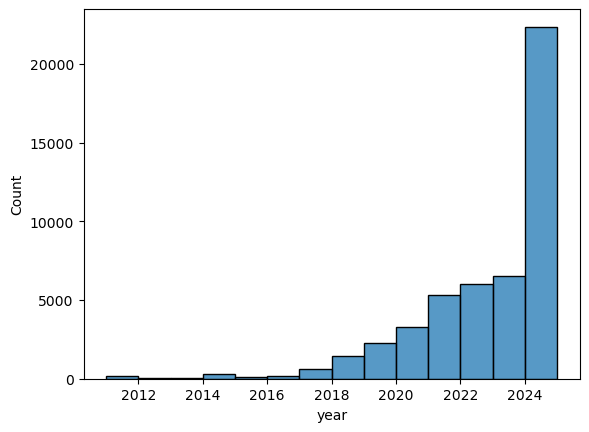

In [79]:
sns.histplot( df, x = 'year', binwidth=1)

<Axes: xlabel='media_count', ylabel='Count'>

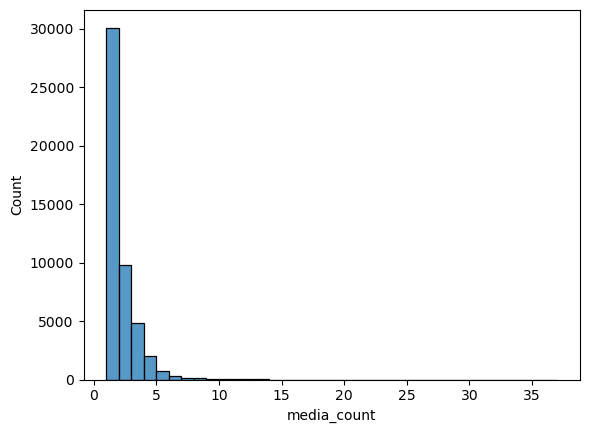

In [81]:
sns.histplot( df, x = 'media_count', binwidth=1)

<Axes: xlabel='year', ylabel='Density'>

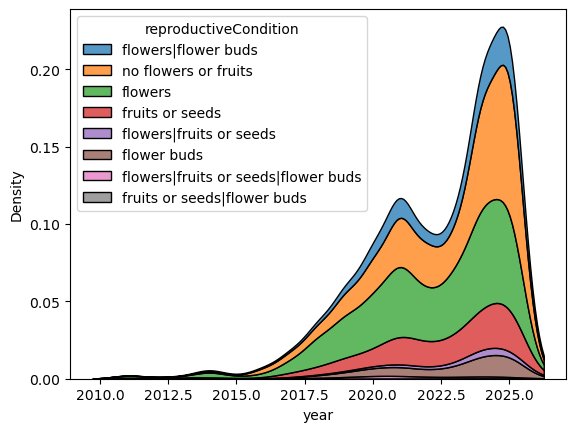

In [82]:
sns.kdeplot( df, x = 'year', hue = 'reproductiveCondition', multiple='stack')

<Axes: xlabel='year', ylabel='month'>

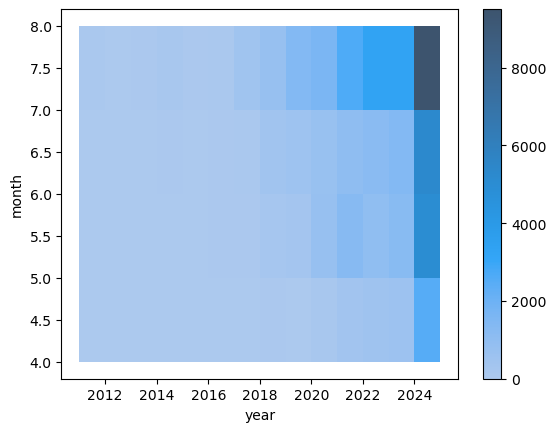

In [83]:
sns.histplot(df, x="year", y="month", binwidth=(1,1), cbar=True)
